<a href="https://colab.research.google.com/github/rdambrosioz/aa_2021/blob/main/aa_tareaFinal_costanzo_dambrosio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA FINAL DE APRENDIZAJE AUTOMÁTICO**
## Universidad de Montevideo
## Ing. en Infórmatica - Sem 2, 2021
### Docente: Sebastián Garcia


## Grupo 2:
* Bruno Costanzo
* Renzo D'Ambrosio

#PARTE 1

Efectúe un profundo EDA del dataset entregado. En caso de que existan dudas de la semántica de alguno de los features del dataset, se recomienda fuertemente investigar sobre el mismo y documentar el resultado.

In [1]:
import sklearn as s
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df_hf = pd.read_csv('https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/heart_failure_clinical_records_dataset.csv', sep=',')
df_hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
features = df_hf.columns[0:-1]
features, df_hf.dtypes

(Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
        'ejection_fraction', 'high_blood_pressure', 'platelets',
        'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
       dtype='object'), age                         float64
 anaemia                       int64
 creatinine_phosphokinase      int64
 diabetes                      int64
 ejection_fraction             int64
 high_blood_pressure           int64
 platelets                   float64
 serum_creatinine            float64
 serum_sodium                  int64
 sex                           int64
 smoking                       int64
 time                          int64
 DEATH_EVENT                   int64
 dtype: object)

Podemos ver que el dataset cuenta con 13 variables y 299 pacientes, a modo de aclaración estos datos fueron recabados en 2015. 

A continuación vamos a ver cada uno de los atributos, son todos de tipo int, salvo platelets y serum_creatinine que son tipo float.

1.   Age: Edad del paciente
2.   Anaemia: afección en la cual careces de suficientes glóbulos rojos sanos para transportar un nivel adecuado de oxígeno a los tejidos del cuerpo.
3.   creatinine_phosphokinase (Creatina fosfocinasa): enzima que está presente en el cuerpo. Se encuentra predominantemente en el corazón, el cerebro y el músculo esquelético
4.   Diabetes: enfermedad en la que los niveles de glucosa (azúcar) de la sangre están muy altos.
5.   ejection_fraction (Fracción de Eyección): medición, expresada como un porcentaje, de la cantidad de sangre que el ventrículo izquierdo bombea hacia fuera con cada contracción. 
6.   high_blood_pressure (Presion arterial alta): afección frecuente en la que la fuerza que ejerce la sangre contra las paredes de tus arterias con el transcurso del tiempo es lo suficientemente alta como para poder causarte problemas de salud, como una enfermedad cardíaca
7.   platelets (Plaquetas): fragmentos de células muy grandes de la médula ósea que se llaman megacariocitos. Ayudan a producir coágulos sanguíneos para hacer más lento el sangrado o frenarlo y para facilitar la cicatrización de las heridas
8.   serum_creatinine (Suero de Creatinina): compuesto químico que resulta de los procesos de producción de energía de los músculos
9.   serum_sodium (Sodio serico): Cantidad de sodio en la sangre. Es necesario para que las celulas del cuertpo funcionen correctamente.
10.   sex (sexo): 0 indica paciente mujer y 1 indica paciente hombre
11.   smoking (fuma): indica si el paciente es fumador o no
12.   time (tiempo): Período de seguimiento en días
13.   death_event (Evento de muerte): Indica si el paciente murio durante el periodo de seguimiento.

In [4]:
df_hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df_hf.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Como podemos apreciar, el dataset no tiene valores nulos.

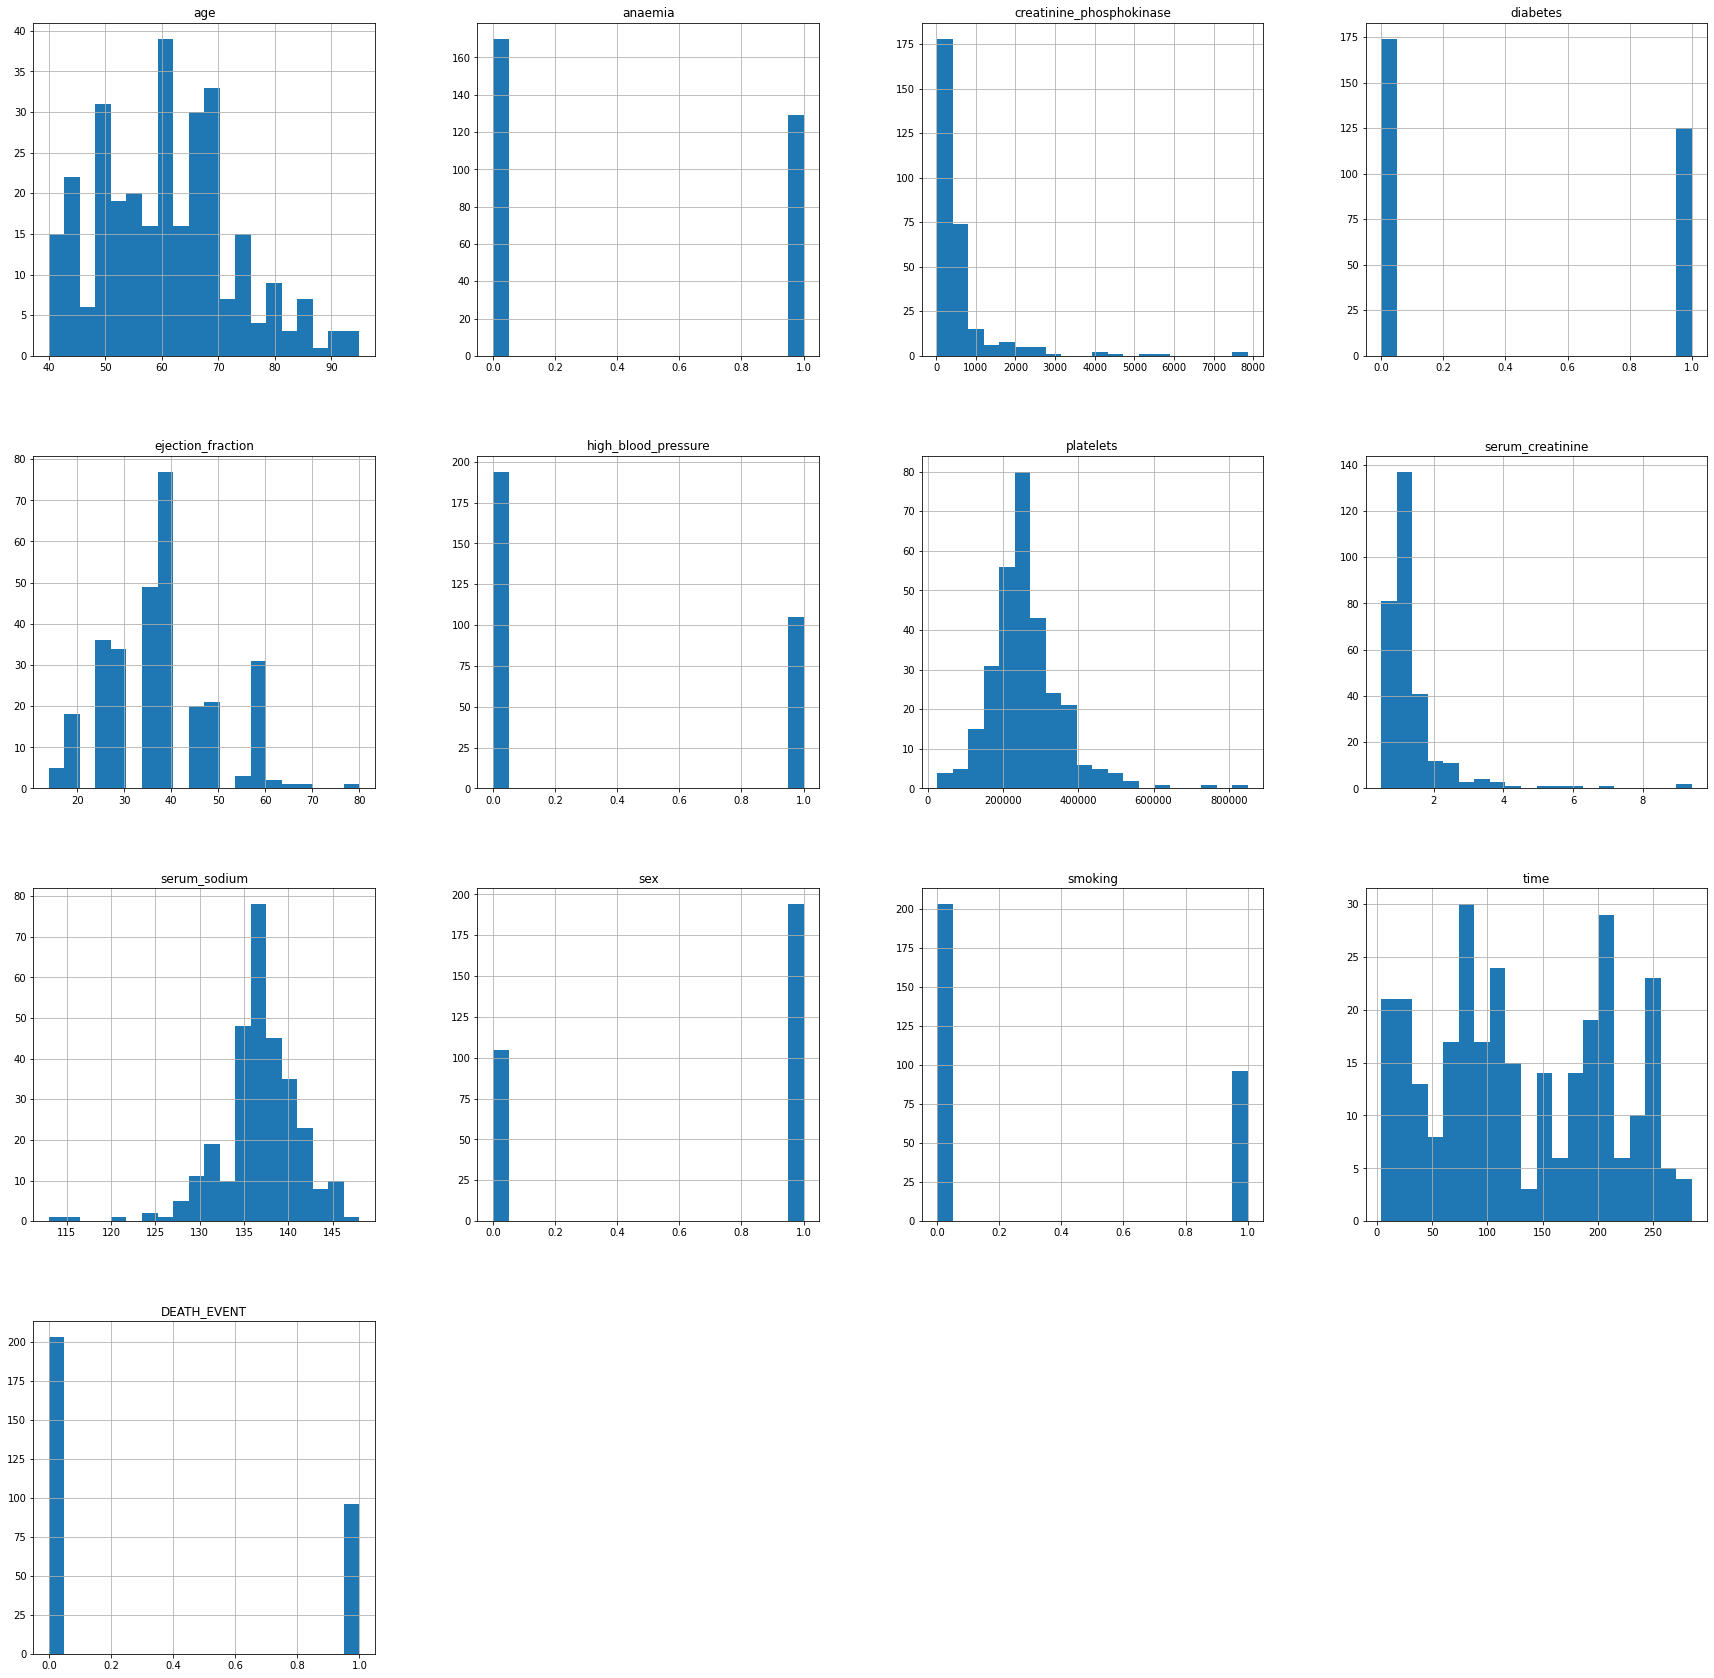

In [6]:
df_hf.hist(figsize=(30,30), bins=20)
plt.show()

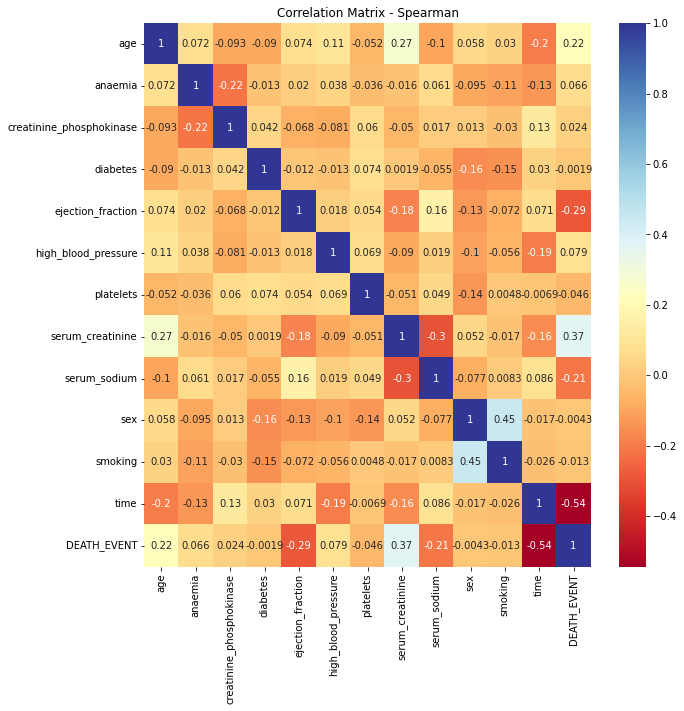

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df_hf.corr(method='spearman'), annot=True, cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Spearman')
plt.show()

Aquí se presentan graficamente las matrices de correlacion de los feature. En particular se utilizan dos metricas de correlación distintas (Pearson y Spearmann)

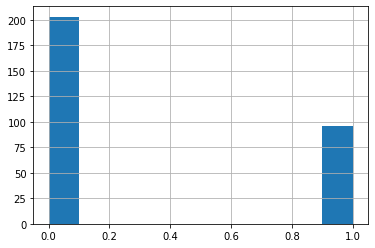

In [9]:
df_hf['DEATH_EVENT'].hist()

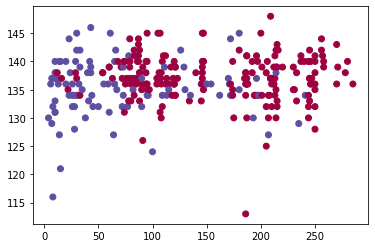

In [10]:
plt.scatter(df_hf['time'], df_hf['serum_sodium'], c=df_hf['DEATH_EVENT'], cmap=plt.cm.get_cmap('Spectral', 2))

Vemos la distribución del atributo 'DEATH_EVENT' que es el que nos va a interesar para el desarrollo del trabajo.

In [11]:
df = px.data.iris()
fig = px.scatter_3d(df_hf, x='time', y='serum_sodium', z='ejection_fraction',
              color='DEATH_EVENT')
fig.show()

In [ ]:
data = df_hf.drop(axis=1, columns='DEATH_EVENT').values
pca = PCA(n_components=3)
pca.fit(data)
data_PCA = pca.transform(data)

In [ ]:
expl = pca.explained_variance_ratio_
print('Primeros 3 PCA:',sum(expl[0:3]))

Primeros 3 PCA: 0.9999999693653626


In [ ]:
df_pca = pd.DataFrame(data_PCA)
df_pca['DEATH_EVENT'] = df_hf['DEATH_EVENT']
df = px.data.iris()
fig = px.scatter_3d(df_pca, x=0, y=1, z=2,
              color='DEATH_EVENT')
fig.show()

# Parte 2

Utilizando las técnicas vistas en el curso, detecte las características de las poblaciones con mayor riesgo de muerte producto de un accidente cardiovascular

## KMEANS

Identificar cluster de 1s y ver caracteristicas

In [113]:
df_features = df_hf.drop(axis=1, columns='DEATH_EVENT').values

In [117]:
inertias = []
silhouettes = []
for i in range(2,20):
  kmeans = KMeans(n_clusters=i, max_iter=300, algorithm='elkan') 
  kmeans.fit(df_features)
  inertias += [kmeans.inertia_]
  silhouettes += [silhouette_score(df_features,kmeans.labels_)]
  cluster = []

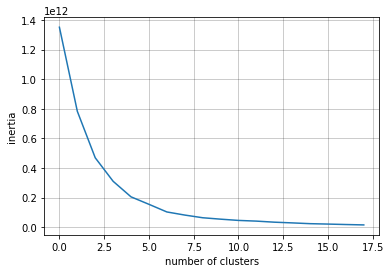

In [118]:
plt.plot(inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

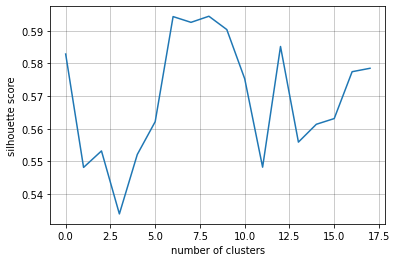

In [119]:
plt.plot(silhouettes)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, max_iter=500, algorithm='elkan') 
kmeans.fit(df_features)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
cluster = []
for instance in df_features:
  cluster += [kmeans.predict(instance.reshape(-1, len(instance)))]

df_hf['Cluster'] = [i[0] for i in cluster]

In [20]:
df_hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Cluster
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,1
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0


In [22]:
pca = PCA(n_components=2)
pca.fit(df_features)
data_PCA_2comp = pca.transform(df_features)

scaler = MinMaxScaler()
data_PCA_2comp = scaler.fit_transform(data_PCA_2comp)

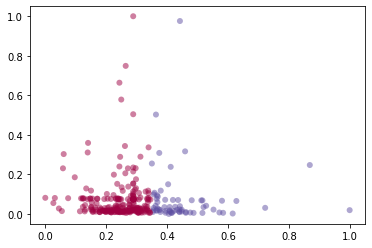

In [25]:
plt.scatter(data_PCA_2comp[:,0], data_PCA_2comp[:,1], c=df_hf['Cluster'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 6))

In [51]:
df_hf.groupby(by=['DEATH_EVENT', 'Cluster'])['DEATH_EVENT', 'Cluster'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



DEATH_EVENT  Cluster
DEATH_EVENT Cluster                      
0           0                162      162
            1                 41       41
1           0                 72       72
            1                 24       24

In [42]:
df_hf['Predictions'] = df_hf.apply(lambda x : (0 if x.Cluster == 0 else 2) if x.DEATH_EVENT == 0 else (1 if x.Cluster == 1 else 3), axis=1)

In [43]:
df = px.data.iris()
fig = px.scatter_3d(df_hf, x='time', y='serum_sodium', z='ejection_fraction',
              color='Predictions')
fig.show()

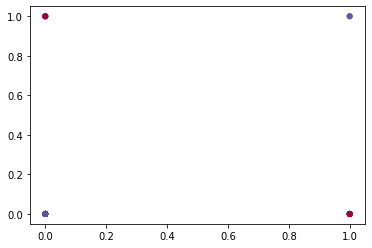

In [27]:
plt.scatter(df_hf['DEATH_EVENT'], df_hf['Cluster'], c=df_hf['Cluster']==df_hf['DEATH_EVENT'], edgecolor='none', alpha=0.1,
              cmap=plt.cm.gddet_cmap('Spectral', 6))

In [28]:
(df_hf['Cluster']==df_hf['DEATH_EVENT']).sum()

186

## Logistic Regression Classifier


In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


In [92]:
df_hf = df_hf.drop(axis=0, columns=['Cluster', 'Predictions'])
df_hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [93]:
df_train, df_test = train_test_split(df_hf, test_size=0.2)
n_features = 12
X_train = df_train.drop(axis = 0, columns= 'DEATH_EVENT')
X_test = df_test.drop(axis = 0, columns= 'DEATH_EVENT')
Y_train = df_train['DEATH_EVENT']
Y_test = df_test['DEATH_EVENT']

In [160]:
from sklearn.metrics import recall_score
def get_scores(Y_pred, probs, Y_test, plot=True):

  # Calcular TP, TN, FP, FN
  # Armar matriz de cofusion
  # Recall, Precision, Accuracy, F1
  # AUC
  # probas = model.predict_proba(X_test)
  fpr, tpr, thresholds = roc_curve(Y_test,probs[:,1])
  if plot:
    plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
    plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    print("AUC: {}" .format(auc(fpr, tpr)))

  accuracy = accuracy_score(Y_test, Y_pred)
    
  
  mat = confusion_matrix(Y_test, Y_pred)
  if plot:
    print (classification_report(Y_test,Y_pred))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Clase de test')
    plt.ylabel('Clase de la predicción');

  recall = recall_score(Y_test, Y_pred)

  return accuracy, recall

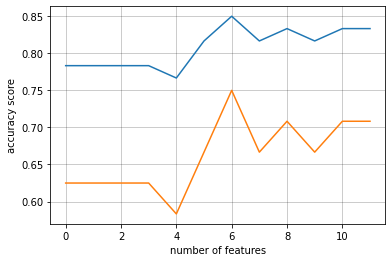

[0.7833333333333333,
 0.7666666666666667,
 0.8166666666666667,
 0.85,
 0.8166666666666667,
 0.8333333333333334,
 0.8166666666666667,
 0.8333333333333334,
 0.8333333333333334]

In [171]:
acu = []
rec= []

model = LogisticRegression(class_weight='balanced', max_iter=500, solver='liblinear', penalty='l2')

for i in range(3, n_features):
  
  selector = SelectKBest(chi2, k=i)
  pipe = Pipeline([('fselector', selector), ('lr', model)])
  pipe.fit(X_train, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test)
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  res = get_scores(Y_pred, new_Y_pewd, Y_test,False)
  acu += [res[0]]
  rec += [res[1]]

plt.plot([acu[0]]*3+acu)
plt.plot([rec[0]]*3+rec)
plt.xlabel('number of features')
plt.ylabel('accuracy score')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()
acu

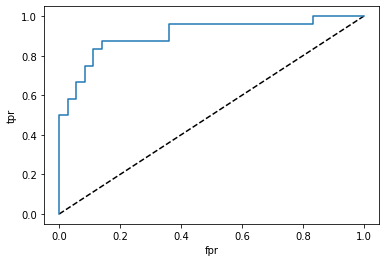

AUC: 0.90625
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       0.86      0.75      0.80        24

    accuracy                           0.85        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.85      0.85      0.85        60



('Accuracy/Recall', (0.85, 0.75))

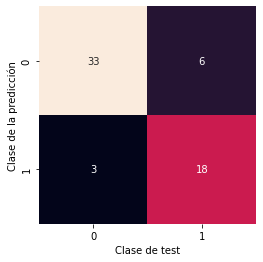

In [172]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=500, solver='liblinear')

pipe = Pipeline([('fselector', SelectKBest(chi2, k=6)), ('lr', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
'Accuracy/Recall', get_scores(Y_pred, new_Y_pewd, Y_test,True)

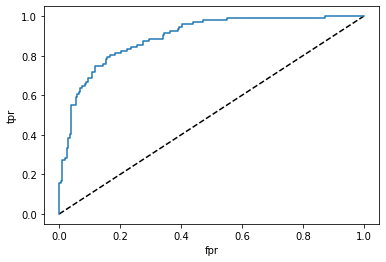

AUC: 0.8933702791461412
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       203
           1       0.70      0.79      0.74        96

    accuracy                           0.82       299
   macro avg       0.80      0.81      0.80       299
weighted avg       0.83      0.82      0.83       299



('Accuracy', (0.822742474916388, 0.7916666666666666))

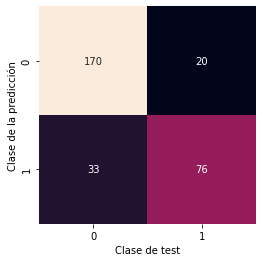

In [173]:
new_Y_pewd = pipe.predict_proba(df_hf.drop(axis = 0, columns= 'DEATH_EVENT'))

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
'Accuracy', get_scores(Y_pred, new_Y_pewd, df_hf['DEATH_EVENT'],True)

In [155]:
f_indices = pipe.named_steps['fselector'].get_support(indices=True)
features = df_hf.columns.values[f_indices]
features

array(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'time'], dtype=object)

In [153]:
df_pos = df_hf.where(df_hf['DEATH_EVENT']==1).dropna()
df_neg = df_hf.where(df_hf['DEATH_EVENT']==0).dropna()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/

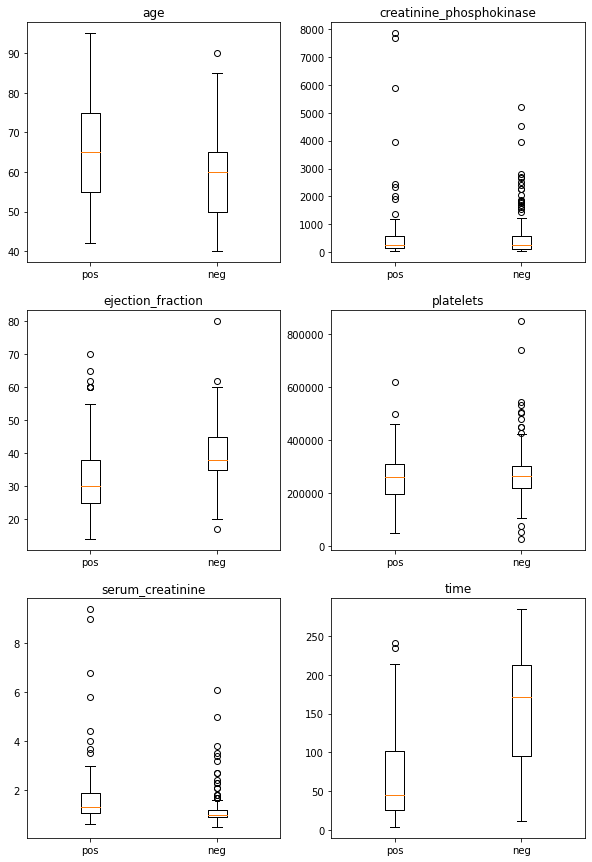

In [154]:
f, ax = plt.subplots(3,2, figsize=(10,15))
i = 0
for j in range(3):
  for a in ax[j]:
    feature = features[i]
    pos = df_pos[feature]
    neg = df_neg[feature]
    dict_age = {'pos':pos.values, 'neg':neg.values}

    a.boxplot(dict_age.values())
    a.set_xticklabels(dict_age.keys())
    a.set_title(feature)

    i+=1


# Parte 3

Para las poblaciones de mayor riesgo, en función de las respuestas obtenidas en el formulario de alta, determine el conjunto de resultados clínicos que el potencial asegurado debe entregar para avanzar en el proceso de obtención de la póliza.

In [156]:
features

array(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'time'], dtype=object)

In [ ]:
exam_feautes = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time']

# Parte 4

Para el conjunto de respuestas obtenidas en el formulario de alta, diseñe un modelo predictivo que determine si el potencial asegurado requiere de la realización de análisis clínicos adicionales o la póliza le será entregada sin averiguaciones adicionales. Documente detalladamente todas las decisiones tomadas.
Actualmente no existen formularios digitalizados con las respuestas de los asegurados, por lo que es necesario la generación de datos sintéticos que representen las distintas poblaciones. Esto datos serán los utilizados para el entrenamiento y test del modelo predictivo.

* Nombres y apellidos
* Fecha de nacimiento
* Peso y estatura
* Deportes que practica
* ¿Actualmente fuma o ha fumado?
* ¿Realiza alguna actividad de riesgo?

* ¿Fue informado alguna vez que presentaba cifras elevadas de tensión arterial o le fue prescripto algún tratamiento para la hipertensión arterial?
* ¿Padece o padeció enfermedades cardiovasculares (infarto, angina de pecho, 
arritmia, cardiopatía, etc.)?
* ¿Recibe actualmente o recibió alguna vez tratamiento a causa de diabetes, 
colesterol, triglicéridos, hormonales, gota, cáncer o tumores

In [213]:
! pip install Faker

In [215]:
from faker import Faker
fake = Faker()



('Michael Best', 'Kara Johnson')

In [311]:
from faker.providers import BaseProvider

# create new provider class
class MyProvider(BaseProvider):
    def age(self) -> int:
        return int(np.random.normal(loc=50, scale=25, size=None)) if y else 0

    def weight(self) -> int:
        return int(np.random.normal(loc=70, scale=5, size=None))

    def height(self) -> int:
        return int(np.random.normal(loc=180, scale=25, size=None))

    def sports(self) -> int:
      return int(np.random.randint(5))

    def smoke(self) -> int:
      return np.random.choice([0, 1], size=None, p=[2/3, 1/3])

    def risk_activity(self) -> int:
      return np.random.choice([0, 1], size=None, p=[1/2, 1/2])
      
    def high_pressute(self) -> int:
      return np.random.choice([0, 1], size=None, p=[1/2, 1/2])

    def card_records(self) -> int:
      return np.random.choice([0, 1], size=None, p=[1/2, 1/2])

    def diabetes(self) -> int:
      return np.random.choice([0, 1], size=None, p=[1/2, 1/2])

In [312]:
fake.add_provider(MyProvider)

In [301]:
columns = {
    'name':'str', 'age':'int', 'weight':'int', 'height':'int', 'sports':'int', 'smoke':'int', 'risk_activity':'int', 'high_pressute':'int', 'card_records':'int', 'diabetes':'int'
}


df_syn = pd.DataFrame(columns=columns)

In [314]:
fake.name(),fake.age(False), fake.weight(), fake.height(), fake.sports(), fake.smoke(), fake.risk_activity(), fake.high_pressute(), fake.card_records(), fake.diabetes()

('Hunter Shelton', 0, 68, 191, 1, 0, 0, 0, 1, 0)

In [303]:
for i in range(1000):
  data = (fake.name(),fake.age(), fake.weight(), fake.height(), fake.sports(), fake.smoke(), fake.risk_activity(), fake.high_pressute(), fake.card_records(), fake.diabetes())
  df_syn = df_syn.append(pd.DataFrame([list(data)], columns=columns))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8151b91190>,
      dtype=object)

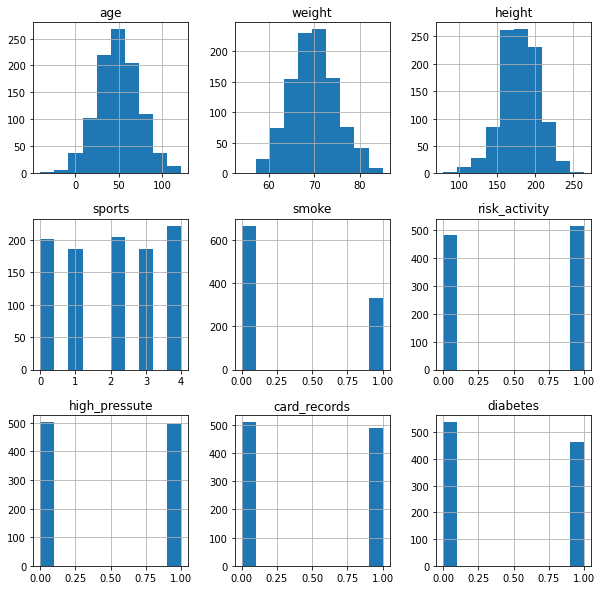

In [310]:
df_syn.drop(axis=0, columns='name').reset_index(drop=True).astype('int').hist(figsize=(10,10))